In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['X', 'Y', 'class']

# Read the CSV file and assign custom column names
df = pd.read_csv('/content/ushape.csv', names=column_names, header=None)

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


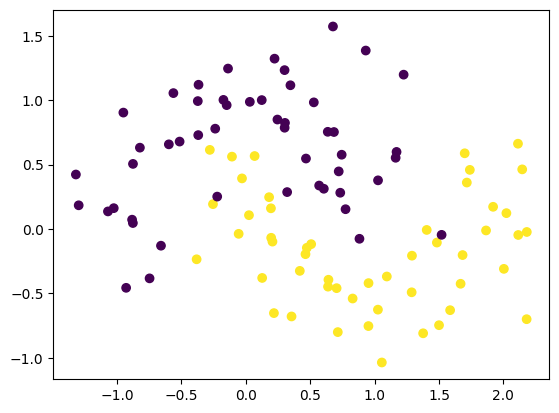

In [4]:
plt.scatter(x = df['X'],y = df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Set parameters to 0
model.get_weights()

[array([[-0.0302881 ,  0.3793611 , -0.19941932,  0.46769172, -0.11581904,
         -0.07333195, -0.1187973 , -0.5021763 ,  0.3265335 , -0.48627633],
        [-0.3429253 ,  0.2492578 , -0.2579952 ,  0.4570338 ,  0.11666363,
          0.5178924 ,  0.45022172, -0.4761142 , -0.07924229,  0.07074416]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5090561 ],
        [-0.3318852 ],
        [ 0.01864076],
        [-0.23482144],
        [ 0.57090515],
        [-0.16510534],
        [-0.4633453 ],
        [ 0.5138764 ],
        [-0.11062515],
        [-0.05015731]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 382ms/step - loss: 0.6934 - accuracy: 0.4250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 77ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 56ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 83ms/step - loss: 0.6932 - accuracy: 0.4250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 61ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 68ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 79ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [15]:
model.get_weights()

[array([[-0.44641623, -0.44641623, -0.44641623, -0.44641623, -0.44641623,
         -0.44641623, -0.44641623, -0.44641623, -0.44641623, -0.44641623],
        [ 0.4619444 ,  0.4619444 ,  0.4619444 ,  0.4619444 ,  0.4619444 ,
          0.4619444 ,  0.4619444 ,  0.4619444 ,  0.4619444 ,  0.4619444 ]],
       dtype=float32),
 array([-0.09471191, -0.09471191, -0.09471191, -0.09471191, -0.09471191,
        -0.09471191, -0.09471191, -0.09471191, -0.09471191, -0.09471191],
       dtype=float32),
 array([[-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094],
        [-0.05861094]], dtype=float32),
 array([0.0607213], dtype=float32)]

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

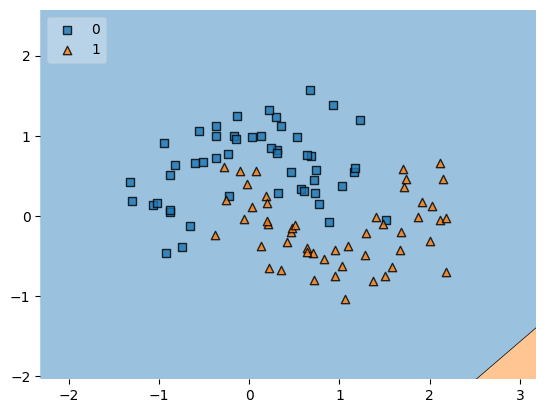

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)